<a href="https://colab.research.google.com/github/TanyaPat01/Generate-Challan/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/content/drive/MyDrive/helmet_detection/images'
for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    if filename.lower().endswith(('.png')):
        img = cv2.imread(img_path)
img.shape

(245, 400, 3)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tensorflow.keras import activations

In [5]:
X_train = []
Y_train = []
image_size = 224
labels = ['with helmet','without helmet']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/helmet_detection/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        # img = img.astype('float32') / 255.0
        X_train.append(img)
        Y_train.append(i)


folderPath = ('/content/drive/MyDrive/helmet_detection/augmented_images')
for j in os.listdir(folderPath):
  img = cv2.imread(os.path.join(folderPath,j))
  img = cv2.resize(img,(image_size,image_size))
  X_train.append(img)
  Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(1411, 224, 224, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu',  padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [11]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
36/36 [==============================] - 15s 58ms/step - loss: 4.0360 - accuracy: 0.6130 - val_loss: 0.6937 - val_accuracy: 0.5906
Epoch 2/50
36/36 [==============================] - 1s 30ms/step - loss: 0.6437 - accuracy: 0.6392 - val_loss: 0.6408 - val_accuracy: 0.5906
Epoch 3/50
36/36 [==============================] - 1s 30ms/step - loss: 0.6028 - accuracy: 0.6743 - val_loss: 0.5945 - val_accuracy: 0.6457
Epoch 4/50
36/36 [==============================] - 1s 30ms/step - loss: 0.5804 - accuracy: 0.6786 - val_loss: 0.6814 - val_accuracy: 0.5906
Epoch 5/50
36/36 [==============================] - 1s 30ms/step - loss: 0.5598 - accuracy: 0.6961 - val_loss: 0.5570 - val_accuracy: 0.7008
Epoch 6/50
36/36 [==============================] - 1s 28ms/step - loss: 0.5038 - accuracy: 0.7417 - val_loss: 0.5317 - val_accuracy: 0.7402
Epoch 7/50
36/36 [==============================] - 1s 27ms/step - loss: 0.4896 - accuracy: 0.7609 - val_loss: 0.5180 - val_accuracy: 0.7244
Epoch 8/50
3

In [12]:
history = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 61ms/step - loss: 1.1619 - accuracy: 0.7817


In [17]:
img = cv2.imread('/content/drive/MyDrive/helmet_detection/without helmet/BikesHelmets112.png')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [18]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

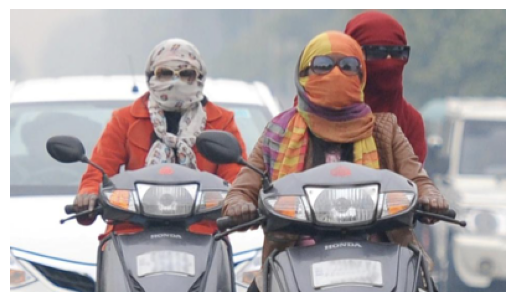

In [24]:
img = cv2.imread('/content/drive/MyDrive/helmet_detection/without helmet/BikesHelmets112.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [19]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 17ms/step


1

In [27]:
img = cv2.imread('/content/drive/MyDrive/helmet_detection/with helmet/BikesHelmets102.png')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

(224, 224, 3)

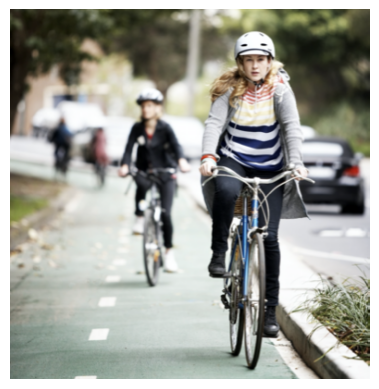

In [26]:
img = cv2.imread('/content/drive/MyDrive/helmet_detection/with helmet/BikesHelmets102.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [28]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

In [29]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 19ms/step


0

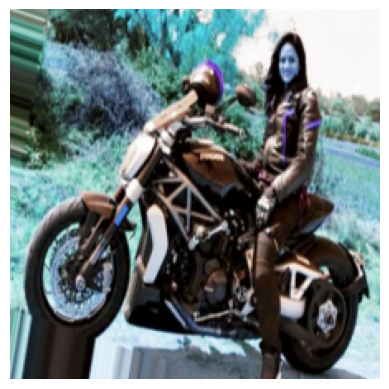

In [34]:
img = cv2.imread('/content/drive/MyDrive/helmet_detection/augmented_images/without_helmet_aug_0_1076.png')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [35]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

In [36]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 25ms/step


1